# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2021**

![Images/Comic.gif](Images/Comic.gif)

---
## Clase 2: Manejo de datos faltantes

### Indice de temas


1. [Datos ruidosos](#1.-Datos-ruidosos)
    * 1.1.[Tipos de datos ruidosos](#1.1-Tipos-de-datos-ruidosos)
    * 1.2 [Datos erróneos](#1.2-Datos-Erróneos)   
    * 1.3 [Datos faltantes](#1.2-Datos-faltantes)
    * 1.4 [Dataset: Primer mirada los datos](#1.3-Dataset:-Primer-mirada-a-los-datos)
        * 1.4.1 [Exploración](#1.4.1-Exploración)
    * 1.5 [Reconocimiento de datos ruidosos](#1.5-Reconocimiento-de-datos-ruidosos)
        * 1.5.1 [Detección de las variables con valor cero del dataset](#1.5.1-Detección-de-las-variables-con-valor-cero-del-dataset)
        * 1.5.2 [Exploracion de las variables Bedroom2, Bathroom y Distance](#1.5.2-Exploracion-de-las-variables-Bedroom2,-Bathroom-y-Distance)
        * 1.5.3 [Ejercicio](#1.5.3-Ejercicio)
    * 1.6 [Reconocimiento de datos faltantes](#1.6-Reconocimiento-de-datos-faltantes)    
    * 1.7 [Librería Missingno](#1.7-Librería-Missingno)
    * 1.8 [Razones que contribuyen a tener datos faltantes](#1.8-Razones-que-contribuyen-a-tener-datos-faltantes)
    * 1.9 [Detección de correlaciones](#1.9-Detección-de-correlaciones)
        * 1.9.1 [Detección de correlaciones usando matrix plot](#1.9.1-Detección-de-correlaciones-usando-matrix-plot)
        * 1.9.2 [Detección de correlaciones usando Heatmap](#1.9.2-Detección-de-correlaciones-usando-Heatmap)


2. [Tratamiento del valor faltante](#2.-Tratamiento-del-valor-faltante)
    * 2.1.[Eliminación de datos faltantes](#2.1-Eliminacion-de-datos-faltantes)
        * 2.1.1[Eliminación de casos completos](#2.1.1-Eliminación-de-casos-completos)
        * 2.1.2[Eliminación de variables](#2.1.2-Eliminación-de-variables)
    * 2.2 [Técnicas de imputación](#2.2-Técnicas-de-imputación)
        * 2.2.1 [Técnicas Básicas](#2.2.1-Técnicas-básica)
        * 2.2.2 [Imputar con el valor más frecuente](#2.2.2-Imputar-con-el-valor-mas-frecuente)
        * 2.2.3 [Ejercicio](#2.2.3-Ejercicio)
    * 2.3 [Técnicas de imputación avanzadas](#2.3-Técnicas-de-imputacion-avanzadas)
        * 2.3.1 [K-Nearest Neighbor Imputation](#2.3.1-K-Nearest-Neighbor-Imputation)
        * 2.3.2 [Multivariate feature imputation](#2.3.2-Multivariate-feature-imputation)
        * 2.3.3 [Ejercicio](#2.3.3-Ejercicio)
        * 2.3.4 [Otros métodos de imputación](#2.3.4-Otros-métodos-de-imputación)

## 1. Datos ruidosos

Una de las conclusiones más importantes de trabajar con información es que los datos nunca se organizan, ni se recolectan de forma simple.
Los datos del mundo real, al combinar diferentes características y calificaciones de objetos y sujetos, muchas veces contienen errores,  lo que requiere una limpieza significativa (y a menudo, experiencia de dominio) para ser utilizables.
Esto es lo que se refiere con **ruido** en los datos.

Casi todos los conjuntos de datos contienen algo de ruido, y cuanto menos ruido haya, mejor (*más limpio*) será el conjunto de datos.
Algunos tipos de ruido son más fáciles de corregir que otros.
A veces eliminar el ruido por completo es simplemente imposible y todo lo que se puede hacer es volver a muestrear y esperar lo mejor, teniendo en cuenta que en procesamiento de datos, <span style="color:FireBrick">**cuando entra basura, sale basura**</span>.

![Images/DatosRuidosos.png](Images/DatosRuidosos.png)

### 1.1 Tipos de datos ruidosos

* El <span style="color:FireBrick">**dato erróneo**</span> es un dato recolectado con algún error, que lo separa de la generalidad.
  Debe ser inspeccionado y tratado especialmente para determinar si es un <span style="color:FireBrick">**ruido**</span> o un dato importante con baja probabilidad de ocurrir, es decir un  <span style="color:FireBrick">**dato atípico**</span> u <span style="color:FireBrick">**outlier**</span>.

* El <span style="color:FireBrick">**dato faltante**</span> es un dato que no está registrado en la database.
  Dependiendo de como se hayan recolectado los datos, y escrito el archivo de datos, pueden estar marcados con un <span style="color:FireBrick">**NaN**</span>, o con un número fuera de rango, como <span style="color:FireBrick">**0**</span> o <span style="color:FireBrick">**-1**</span>.
  Es muy importante reconocer la codificación de datos faltantes, para no confundirlos con un dato válido recolectado.

### 1.2 Datos Erróneos

Los datos erróneos se dividen en <span style="color:FireBrick">**datos atípicos**</span> y <span style="color:FireBrick">**datos mal codificados**</span>.

Los <span style="color:FireBrick">**datos atípicos**</span> son datos reales, sin embargo, pueden producir demasiada palanca sobre los estadísticos de tendencia central y desviación, lo cual los hace candidatos a ser retirados del dataset.

Los <span style="color:FireBrick">**datos mal codificados**</span> son la fuente de error más común, donde en muchos casos no puede ser detectada.
Es importante detectar cuando los datos faltantes fueron codificados como valores fuera de rango, por ejemplo el valor <span style="color:FireBrick">**cero**</span>.
Este error suele aparecer cuando se mezclan databases con distinta codificación para datos faltantes.

### 1.3 Datos Faltantes

Los datos faltantes se dividen en <span style="color:FireBrick">**datos perdidos**</span> y <span style="color:FireBrick">**datos inexistentes**</span>.

* Un <span style="color:FireBrick">**dato perdido**</span> es un dato que uno sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.

* Un  <span style="color:FireBrick">**dato inexistente**</span> es un dato faltante (por lo cual es ruido), pero a la vez no lo es pues no existe.
  Esto es, no puede ser recolectado.

*Python* no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases.
Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado.

Sin embargo, en *Python* existe el objeto <span style="color:FireBrick">**None**</span>, el cual es un *single null datatype*.
El dato <span style="color:FireBrick">**NaN**</span> puede ser usado como valor numérico en operaciones matemáticas, mientras que <span style="color:FireBrick">**None**</span> no, o al menos no debería.

* <span style="color:FireBrick">**NaN**</span> es un valor numérico, definido en *IEEE 754 floating-point standard*.

* <span style="color:FireBrick">**None**</span> es un *internal Python type* (**NoneType**), y es más parecido al *no existente* o *vacío* que al *numerically invalid* en este contexto.

¿Porque no puede usarse <span style="color:FireBrick">**None**</span> como el dato nulo de *Python*?
Porque *Numpy* y *Pandas* no propagan estos datos a través de las operaciones aritméticas, y para evitar usarlo en un algoritmo hay que testear cada dato para ver si es **None**.

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1   2.00
2   3.00
dtype: float64

In [3]:
s = pd.Series(['a', 'b', 'c'])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

### 1.3 Dataset: Primer mirada a los datos

Este es el punto en el que entramos en la parte de la **ciencia de datos** que necesita mucho de la *intuición de datos*, que consiste en *mirar realmente sus datos, y tratar de averiguar por qué son así, y cómo esto afecta al análisis*.

Puede ser una parte frustrante de la ciencia de datos, especialmente si se es nuevo en el campo y no se tiene mucha experiencia.

<span style="color:FireBrick">**Para lidiar con los valores erróneos**</span>, hay que estudiar las distribuciones de las variables y detectar los valores atípicos, teniendo en cuenta la forma de recolección de los datos.
Un dato atípico puede ser un valor posible de una variable con cola pesada, o puede ser un error al recolectar los datos.
Hay valores atípicos que enmascaran valores faltantes.

<span style="color:FireBrick">**Para lidiar con los valores perdidos**</span>, es necesario usar la intuición para averiguar por qué falta el valor.
Una de las preguntas más importantes que puede hacerse para ayudar a resolver esto es la siguiente:

- <span style="color:FireBrick">**¿Falta este valor porque no se registró, o porque no existe?**</span>

Por ejemplo:

- Una casa de 2 dormitorios, no incluiría una respuesta para el tamaño del tercer dormitorio.

- Alguien que está siendo encuestado puede optar por no compartir sus ingresos.

Si falta un valor porque <span style="color:FireBrick">**no existe**</span> (como la altura del hijo mayor de alguien que no tiene hijos), no tiene sentido intentar adivinar cuál podría ser.
Estos son los valores que probablemente desee mantener como **NaN**, o codificados con un valor constante muy lejos del rango real de la variable. 

Por otro lado, si falta un valor <span style="color:FireBrick">**porque no se registró**</span>, puede intentar adivinar cuál podría haber sido ese valor basándose en los otros valores de la columna y de la fila.

En estadística, <span style="color:FireBrick">**predecir**</span> es otorgar valor a un dato que todavía no ha sido muestreado, e <span style="color:FireBrick">**imputar**</span> es estimar un valor que puede haber sido muestreado pero no se lo conoce.

### 1.4 Exploración

Lo primero que hago cuando obtengo un nuevo conjunto de datos es echar un vistazo a algunos de ellos.
Esto me permite ver si el dataset se ha leído correctamente, y tener una idea de lo que está sucediendo con los datos.
En este caso, estoy buscando para ver si encuentro algún valor faltante, que se representará con <span style="color:FireBrick">**NaN**</span> o <span style="color:FireBrick">**None**</span>.
También tengo que observar si hay números fuera de rango, como <span style="color:FireBrick">**0**</span> o números negativos que no corresponden al rango de la variable.

Vamos a trabajar con el dataset <span style="color:FireBrick">**Melbourne Housing Snapshot**</span>, es un conjunto reducido de información sobre ventas de propiedades, con el objetivo de observar tendencias en las ventas, y predecir precios.

Carguemos las librerías necesarias para trabajar.

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_context('talk')

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

%matplotlib inline

Carguemos los datos.

In [5]:
melb_data = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [6]:
melb_data.shape

(13580, 21)

In [7]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


Estudiemos la definición de las variables que vamos a tener desplegadas en columnas.
Recordemos que los casos son las filas.

 Variables

- **Suburb** Region.

- **Address** Property address.

- **Rooms** Number of rooms.

- **Price** Price in dollars.

- **Method**
    - S - property sold;
    - SP - property sold prior;
    - PI - property passed in;
    - PN - sold prior not disclosed;
    - SN - sold not disclosed;
    - NB - no bid;
    - VB - vendor bid;
    - W - withdrawn prior to auction;
    - SA - sold after auction;
    - SS - sold after auction price not disclosed;
    - N/A - price or highest bid not available.

- **Type**
    - br - bedroom(s);
    - h - house, cottage, villa, semi, terrace;
    - u - unit, duplex;
    - t - townhouse;
    - dev site - development site;
    - o res - other residential.

- **SellerG** Real Estate Agent.

- **Date** Date sold.

- **Distance** Distance from CBD.

- **Regionname** General Region (West, North West, North, North East, etc.).

- **Propertycount** Number of properties that exist in the suburb.

- **Bedroom2** Scraped # of Bedrooms (from different source).

- **Bathroom** Number of Bathrooms.

- **Car** Number of carspots.

- **Landsize** Land Size.

- **BuildingArea** Building Size.

- **CouncilArea** Governing council for the area.

In [9]:
data = melb_data.sample(10, random_state=123)

data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5799,St Kilda,25/69 Wellington St,2,u,542500.00,PI,McGrath,10/09/2016,6.10,3182.00,...,1.00,1.00,0.00,NaN,NaN,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
10596,Broadmeadows,48 Walsh St,3,h,386000.00,S,hockingstuart,8/07/2017,14.00,3047.00,...,1.00,1.00,341.00,71.00,1965.00,Hume,-37.69,144.92,Northern Metropolitan,4294.00
7471,Ascot Vale,17 Monash St,3,h,1230000.00,PI,Nelson,20/05/2017,5.90,3032.00,...,1.00,2.00,538.00,NaN,NaN,Moonee Valley,-37.78,144.91,Western Metropolitan,6567.00
2308,Elwood,2/129 Brighton Rd,2,u,684000.00,SP,McGrath,19/11/2016,7.70,3184.00,...,1.00,0.00,0.00,98.00,1930.00,Port Phillip,-37.88,144.99,Southern Metropolitan,8989.00
2602,Fitzroy North,264 Barkly St,3,h,1600000.00,S,Collins,25/02/2017,3.50,3068.00,...,1.00,0.00,370.00,NaN,NaN,Yarra,-37.78,144.99,Northern Metropolitan,6244.00
3159,Hawthorn,16 Pine St,3,h,1712000.00,S,Marshall,12/11/2016,4.60,3122.00,...,1.00,1.00,342.00,130.00,1900.00,Boroondara,-37.81,145.02,Southern Metropolitan,11308.00
5781,St Kilda,1/62 Wellington St,1,u,500000.00,SP,Biggin,4/03/2017,6.10,3182.00,...,1.00,1.00,2335.00,58.00,2002.00,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
2443,Essendon,1/19 Cameron Rd,2,u,691000.00,SP,Brad,25/02/2017,8.00,3040.00,...,1.00,1.00,201.00,80.00,1995.00,Moonee Valley,-37.75,144.93,Western Metropolitan,9264.00
6005,Sunshine,165 Morris St,3,h,591500.00,S,Barry,30/07/2016,12.60,3020.00,...,1.00,2.00,427.00,NaN,NaN,Brimbank,-37.79,144.83,Western Metropolitan,3755.00
6365,Toorak,4/264 Williams Rd,2,u,810000.00,SP,Jellis,10/12/2016,4.60,3142.00,...,2.00,2.00,0.00,94.00,1980.00,Stonnington,-37.84,145.00,Southern Metropolitan,7217.00


### 1.5 Reconocimiento de datos ruidosos

Parece que hay variables con valores faltantes, que han sido reconocidos por *pandas* como <span style="color:FireBrick">**NaN**</span>, y valores <span style="color:FireBrick">**0**</span> que podrían ser tambien datos faltantes.

En esta muestra vemos las variables <span style="color:FireBrick">**Landsize**</span>, <span style="color:FireBrick">**BuildingArea**</span>, <span style="color:FireBrick">**YearBuilt**</span> con problemas potenciales.

- <span style="color:FireBrick">**Landsize**</span> tiene valores <span style="color:FireBrick">**0**</span>.

- <span style="color:FireBrick">**BuildingArea**</span> y <span style="color:FireBrick">**YearBuilt**</span> tienen <span style="color:FireBrick">**NaN**</span>.

¿Son estas las únicas variables con problemas?

**Rta** No, la variable <span style="color:FireBrick">**Car**</span> también tiene valores faltantes.

¿Como puedo encontrar TODAS las variables que tengo que estudiar?

**Rta** Se debería verificar cada una de las columnas de forma individual.
Tenemos que buscar datos **NaN** que representan valores faltantes, y datos atípicos que codifican valores faltantes.

### 1.5.1 Detección  de las variables con valor cero del dataset

In [10]:
cols = melb_data[melb_data == 0].count(axis=0)

cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

Recordemos que tenemos **13580** casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante.
La pregunta a responder es ¿Son estos ceros valores posibles de la variable o datos faltantes codificados así?

Vamos a trabajar con las variables <span style="color:FireBrick">**Bedroom2**</span>, <span style="color:FireBrick">**Bathroom**</span>, <span style="color:FireBrick">**Distance**</span>, y vamos a dejar las otras como ejercicio.

### 1.5.2 Exploración de las variables Bedroom2,  Bathroom, y Distance

### Estudiemos los tipos de propiedades SIN DORMITORIOS

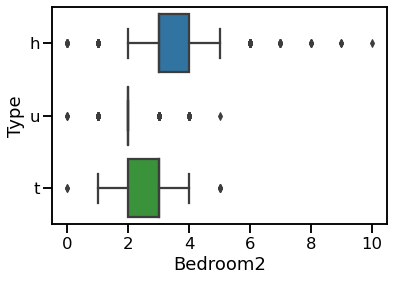

In [11]:
sns.boxplot(data=melb_data[melb_data.Bedroom2 < 20], x='Bedroom2', y='Type');

Recordemos que solo había **16** casos con valores cero.
Y hay *unit*, *houses*, y *townhouses* sin dormitorios.
Se puede pensar que hay unidades monoambiente de estilo moderno, donde conviven la cocina y el dormitorio.
Es difícil pensar que hay casas sin dormitorios.
Ese parece ser un **dato faltante**, pues <span style="color:FireBrick">**Bedroom2**</span> es un dato obtenido mediante la unión con otra database.

Miremos en forma conjunta la variable <span style="color:FireBrick">**Rooms**</span>, y la variable <span style="color:FireBrick">**Bedroom2**</span>.

In [12]:
Bedroom2 = melb_data.Bedroom2
Rooms = melb_data.Rooms

pd.crosstab(Bedroom2, Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.00,0,5,8,3,0,0,0,0,0
1.00,663,21,5,2,0,0,0,0,0
2.00,16,3539,162,19,1,0,0,0,0
3.00,2,74,5626,175,18,1,0,0,0
4.00,0,8,73,2473,42,4,0,1,0
5.00,0,1,5,15,531,2,2,0,0
6.00,0,0,0,0,2,59,0,2,0
7.00,0,0,0,0,1,1,8,0,0
8.00,0,0,0,0,1,0,0,4,0


Lamentablemente, la variable <span style="color:FireBrick">**Rooms**</span> es mucho más informativa que la variable <span style="color:FireBrick">**Bedroom2**</span>. 

### Ejemplo de acción: eliminar la variable Bedroom2.

**¡Nunca accionar sobre el dataset original!**

In [13]:
melb_df = melb_data.copy()
melb_df = melb_df.drop(['Bedroom2'], axis=1)

melb_df.sample(10, random_state=123)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5799,St Kilda,25/69 Wellington St,2,u,542500.00,PI,McGrath,10/09/2016,6.10,3182.00,1.00,1.00,0.00,NaN,NaN,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
10596,Broadmeadows,48 Walsh St,3,h,386000.00,S,hockingstuart,8/07/2017,14.00,3047.00,1.00,1.00,341.00,71.00,1965.00,Hume,-37.69,144.92,Northern Metropolitan,4294.00
7471,Ascot Vale,17 Monash St,3,h,1230000.00,PI,Nelson,20/05/2017,5.90,3032.00,1.00,2.00,538.00,NaN,NaN,Moonee Valley,-37.78,144.91,Western Metropolitan,6567.00
2308,Elwood,2/129 Brighton Rd,2,u,684000.00,SP,McGrath,19/11/2016,7.70,3184.00,1.00,0.00,0.00,98.00,1930.00,Port Phillip,-37.88,144.99,Southern Metropolitan,8989.00
2602,Fitzroy North,264 Barkly St,3,h,1600000.00,S,Collins,25/02/2017,3.50,3068.00,1.00,0.00,370.00,NaN,NaN,Yarra,-37.78,144.99,Northern Metropolitan,6244.00
3159,Hawthorn,16 Pine St,3,h,1712000.00,S,Marshall,12/11/2016,4.60,3122.00,1.00,1.00,342.00,130.00,1900.00,Boroondara,-37.81,145.02,Southern Metropolitan,11308.00
5781,St Kilda,1/62 Wellington St,1,u,500000.00,SP,Biggin,4/03/2017,6.10,3182.00,1.00,1.00,2335.00,58.00,2002.00,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
2443,Essendon,1/19 Cameron Rd,2,u,691000.00,SP,Brad,25/02/2017,8.00,3040.00,1.00,1.00,201.00,80.00,1995.00,Moonee Valley,-37.75,144.93,Western Metropolitan,9264.00
6005,Sunshine,165 Morris St,3,h,591500.00,S,Barry,30/07/2016,12.60,3020.00,1.00,2.00,427.00,NaN,NaN,Brimbank,-37.79,144.83,Western Metropolitan,3755.00
6365,Toorak,4/264 Williams Rd,2,u,810000.00,SP,Jellis,10/12/2016,4.60,3142.00,2.00,2.00,0.00,94.00,1980.00,Stonnington,-37.84,145.00,Southern Metropolitan,7217.00


### Estudiemos los tipos de propiedades SIN BAÑOS

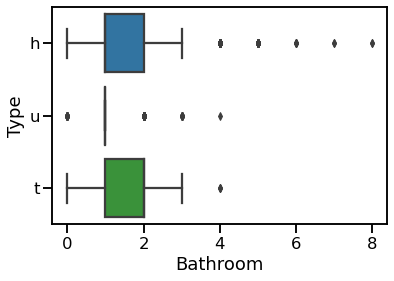

In [14]:
sns.boxplot(data=melb_data, x='Bathroom', y='Type');

In [15]:
Bathroom = melb_data.Bathroom

pd.crosstab(Bathroom, Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.00,1,19,11,3,0,0,0,0,0
1.00,674,3117,3250,452,17,2,0,0,0
2.00,6,504,2459,1720,260,20,3,2,0
3.00,0,8,153,469,244,35,5,2,1
4.00,0,0,5,41,47,9,2,2,0
5.00,0,0,1,2,25,0,0,0,0
6.00,0,0,2,0,2,1,0,0,0
7.00,0,0,0,0,1,0,0,1,0
8.00,0,0,0,1,0,0,0,1,0


### Ejemplo de acción: considerar que las propiedades que no listan baños suponen que existe al menos uno.

In [16]:
melb_df.loc[melb_df.Bathroom < 1, 'Bathroom'] = 1

cols_ = melb_df[melb_df == 0].count(axis=0)
cols_[cols_ > 0]

Distance           6
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

In [17]:
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

Como podemos observar, en mi dataset editado, no está la variable <span style="color:FireBrick">**Bedroom2**</span> y la categoria <span style="color:FireBrick">**Bathroom**</span> no tiene ceros.

In [18]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [19]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,1.54,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,1.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


### <span style="color:FireBrick">**1.5.3 Ejercicio: Dadas las columnas del dataset que tienen ceros, decidir si son ceros válidos, o son datos erróneos, o datos faltantes enmascarados. Decidir acciones.**</span>

#### Estudio de variable <span style="color:FireBrick">**Distance**</span>.

In [20]:
relevant_cols = ['Suburb', 'CouncilArea', 'Regionname', 'Address', 'Type', 'Price', 'Distance']

In [21]:
# Obtengo las propiedades con distancia cero.
data = melb_df[melb_df.Distance == 0]

data[relevant_cols]

,Suburb,CouncilArea,Regionname,Address,Type,Price,Distance
9620,Melbourne,Melbourne,Northern Metropolitan,19/300 King St,u,740000.00,0.00
10393,Melbourne,Melbourne,Northern Metropolitan,1814/250 Elizabeth St,u,720000.00,0.00
10739,Melbourne,Melbourne,Northern Metropolitan,61/299 Queen St,u,1075000.00,0.00
11428,Melbourne,Melbourne,Northern Metropolitan,806/22 Coromandel Pl,u,387000.00,0.00
12073,Melbourne,Melbourne,Northern Metropolitan,709/87 Franklin St,u,565000.00,0.00
12074,Melbourne,Melbourne,Northern Metropolitan,713/118 Russell St,u,540000.00,0.00


In [22]:
data = melb_df[ (melb_df.Suburb == 'Melbourne')
              & (melb_df.CouncilArea == 'Melbourne')
              & (melb_df.Regionname == 'Northern Metropolitan')
              & (melb_df.Type == 'u')
              ]

data[relevant_cols]

,Suburb,CouncilArea,Regionname,Address,Type,Price,Distance
3976,Melbourne,Melbourne,Northern Metropolitan,902/16 Liverpool St,u,427000.00,2.80
3977,Melbourne,Melbourne,Northern Metropolitan,14/2 Exhibition St,u,1160500.00,2.80
3978,Melbourne,Melbourne,Northern Metropolitan,2306/265 Exhibition St,u,780000.00,2.80
3979,Melbourne,Melbourne,Northern Metropolitan,1501/87 Franklin St,u,535000.00,2.80
3980,Melbourne,Melbourne,Northern Metropolitan,3811/80 Abeckett St,u,450000.00,2.80
3981,Melbourne,Melbourne,Northern Metropolitan,405/270 King St,u,360000.00,2.80
3982,Melbourne,Melbourne,Northern Metropolitan,805/300 Swanston St,u,665000.00,2.80
3983,Melbourne,Melbourne,Northern Metropolitan,1615/250 Elizabeth St,u,386000.00,2.80
3984,Melbourne,Melbourne,Northern Metropolitan,49/2 Exhibition St,u,659000.00,2.80
3985,Melbourne,Melbourne,Northern Metropolitan,1/5 Davisons Pl,u,671000.00,2.80


**Acción**
Parece que son datos erróneos mal codificados.
Se les puede asignar la **moda** de la columna.

También existe la posibilidad que sean ceros válidos, ya que se encontrarían en el centro de Melbourne, por lo que su distancia sería cero.

Se necesita más conocimiento de dominio, ya que tenemos la dirección de la propiedad por lo que podríamos calcular la distancia al centro.

In [23]:
df_mode = data['Distance'].mode()[0]

print(f'Moda: {df_mode}')

Moda: 2.8


In [24]:
melb_df.loc[melb_df.Distance == 0, 'Distance'] = df_mode

cols_ = melb_df[melb_df == 0].count(axis=0)
cols_[cols_ > 0]

Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

#### Estudio de variable <span style="color:FireBrick">**Car**</span>.

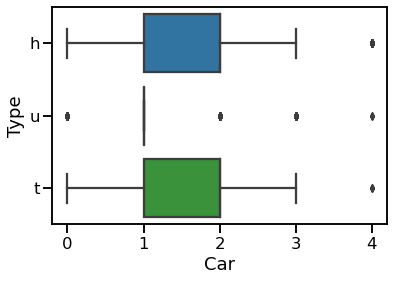

In [25]:
sns.boxplot(data=melb_data[melb_data.Car < 5], x='Car', y='Type');

In [26]:
relevant_cols = ['Type', 'Rooms', 'Distance', 'Landsize', 'Price', 'Car']

In [27]:
# Obtengo las propiedades sin cocheras.
data = melb_df[melb_df.Car == 0]

data[relevant_cols].sample(10)

,Type,Rooms,Distance,Landsize,Price,Car
9259,h,2,1.80,102.00,970000.00,0.00
2215,h,4,8.50,147.00,1100000.00,0.00
6346,h,2,4.60,338.00,1300000.00,0.00
1092,h,2,11.20,352.00,1570000.00,0.00
10358,h,3,11.70,534.00,825000.00,0.00
1672,h,4,3.20,122.00,1425000.00,0.00
4464,h,3,5.50,279.00,980000.00,0.00
4851,h,2,4.50,98.00,765000.00,0.00
9389,h,3,6.30,230.00,1225000.00,0.00
8640,h,2,4.20,184.00,903000.00,0.00


**Acción**
Parece que son ceros válidos, ya que una propiedad sin cochera no da la impresión de ser un *dato erróneo*, ni tampoco ser un *dato faltante* debido que actualmente hay valores **NaN** en la columna.
¿Debería ser más probable que una propiedad de tipo **u** no tenga cochera, en comparación a una propiedad de tipo **h** o de tipo **t**?

Puede haber excepciones para propiedades con un terreno (**Landsize**) demasiado grande.

#### Estudio de variable <span style="color:FireBrick">**Landsize**</span>.

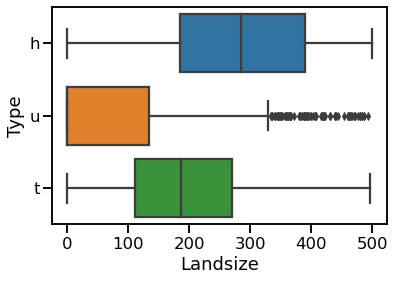

In [28]:
sns.boxplot(data=melb_data[melb_data.Landsize < 500], x='Landsize', y='Type');

In [29]:
relevant_cols = ['Type', 'Rooms', 'Car', 'Price', 'YearBuilt', 'BuildingArea', 'Landsize']

In [30]:
# Obtengo las propiedades sin terreno.
data = melb_df[melb_df.Landsize == 0]

data[relevant_cols].sample(10)

,Type,Rooms,Car,Price,YearBuilt,BuildingArea,Landsize
9356,u,1,1.00,550000.00,1965.00,64.00,0.00
1370,u,1,1.00,240000.00,NaN,NaN,0.00
1105,u,1,1.00,375000.00,1965.00,40.00,0.00
1062,h,3,2.00,1302500.00,1993.00,171.00,0.00
3824,h,4,3.00,2355000.00,1915.00,223.00,0.00
2502,u,2,1.00,438000.00,NaN,NaN,0.00
10622,t,3,1.00,930000.00,2011.00,127.00,0.00
11058,u,1,1.00,505000.00,1960.00,52.00,0.00
10020,h,3,2.00,630000.00,NaN,NaN,0.00
6783,u,1,1.00,370000.00,NaN,NaN,0.00


In [31]:
# Obtengo las propiedades sin terreno (excluyendo departamentos).
data = melb_df[(melb_df.Landsize == 0) & (melb_df.Type != 'u')]

data[relevant_cols].sample(10)

,Type,Rooms,Car,Price,YearBuilt,BuildingArea,Landsize
7469,t,4,2.00,900000.00,2011.00,159.00,0.00
6791,t,3,2.00,800000.00,NaN,NaN,0.00
6683,h,3,1.00,600000.00,NaN,NaN,0.00
1964,t,3,2.00,590000.00,2013.00,109.00,0.00
3933,t,2,1.00,470000.00,NaN,NaN,0.00
10426,t,1,1.00,470000.00,2000.00,76.00,0.00
11272,t,3,1.00,762000.00,NaN,NaN,0.00
6673,t,3,1.00,620000.00,2014.00,141.00,0.00
6842,h,3,1.00,1550000.00,NaN,192.00,0.00
5001,h,4,1.00,660000.00,NaN,NaN,0.00


**Acción**

Parece que son datos erróneos mal codificados.
Se les puede asignar la **media** de la columna (decisión arbitraria), donde podríamos ignorar el caso de los departamentos ya que el *boxplot* los representa como datos comúnes.

También existe la posibilidad que sean ceros válidos, al menos en el caso de los departamentos, ya que no poseen propiamente un terreno.

In [32]:
filtroTerreno = melb_df.Landsize == 0
for t in ['h', 'u', 't']:
    filtroTipo = melb_df.Type == t

    df_mean = melb_df[filtroTipo].Landsize.mean()
    print(f'Media ({t}): {df_mean}')    

    melb_df.loc[(filtroTerreno) & (filtroTipo), 'Landsize'] = df_mean

cols_ = melb_df[melb_df == 0].count(axis=0)
cols_[cols_ > 0]

Media (h): 617.1819240131231
Media (u): 477.3142194232681
Media (t): 279.6068222621185


Car             1026
BuildingArea      17
dtype: int64

#### Estudio de variable <span style="color:FireBrick">**BuildingArea**</span>.

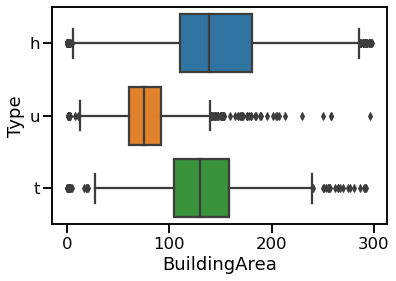

In [33]:
sns.boxplot(data=melb_data[melb_data.BuildingArea < 300], x='BuildingArea', y='Type');

In [34]:
relevant_cols = ['Type', 'Rooms', 'Car', 'Price', 'Landsize', 'BuildingArea']

In [35]:
# Obtengo las propiedades sin edificación.
data = melb_df[melb_df.BuildingArea == 0]

data[relevant_cols]

,Type,Rooms,Car,Price,Landsize,BuildingArea
4344,t,2,1.00,841000.00,215.00,0.00
12226,h,5,2.00,1950000.00,743.00,0.00
12249,h,3,2.00,814000.00,542.00,0.00
12395,h,4,2.00,570000.00,504.00,0.00
12412,t,3,2.00,900000.00,120.00,0.00
13040,h,3,1.00,1390000.00,125.00,0.00
13207,h,3,4.00,1205000.00,622.00,0.00
13348,h,5,2.00,2800000.00,1173.00,0.00
13370,h,3,2.00,1650000.00,623.00,0.00
13380,h,4,1.00,815000.00,525.00,0.00


**Acción**

Parece que son datos erróneos mal codificados.
Se les puede asignar la **mediana** de la columna (decisión arbitraria), donde hay que notar que solo son propiedades de tipo **h** y de tipo **t**.
Incluso es importante destacar que el *boxplot* los representa como datos anómalos.

In [36]:
filtroArea = melb_df.BuildingArea == 0
for t in ['h', 'u', 't']:
    filtroTipo = melb_df.Type == t

    df_median = melb_df[filtroTipo].BuildingArea.median()
    print(f'Mediana ({t}): {df_median}')

    melb_df.loc[(filtroArea) & (filtroTipo), 'BuildingArea'] = df_median

cols_ = melb_df[melb_df == 0].count(axis=0)
cols_[cols_ > 0]

Mediana (h): 144.0
Mediana (u): 75.0
Mediana (t): 130.0


Car    1026
dtype: int64

### 1.6 Reconocimiento de datos faltantes

- La falta de datos puede limitar nuestra capacidad para realizar tareas importantes de ciencia de datos, como convertir tipos de datos o visualizar datos.

- Los datos faltantes pueden reducir el poder estadístico de nuestros modelos, lo que a su vez aumenta la probabilidad de error de tipo **II**.
  El error de tipo **II** es la imposibilidad de rechazar una *hipótesis nula* cuando es falsa.

- Los datos faltantes pueden reducir la representatividad de las muestras en el conjunto de datos.

- La falta de datos completos puede distorsionar la validez de los ensayos científicos, y puede llevar a conclusiones inválidas.

Las bibliotecas de *Python* representan los números faltantes como <span style="color:FireBrick">**NaN**</span>, que es la abreviatura de *no es un número*.
Vamos a detectar qué celdas tienen valores perdidos, y luego contar cuántos hay en cada columna con los comandos: `df.isna()` y `df.info()`.

In [37]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [38]:
missing_values_count = melb_data.isna().sum()

missing_values_count

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

El dataset donde empezamos a corregir ...

In [39]:
melb_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Hay bastantes, pero concentrados en tres variables (principalmente).
Veamos cual es el porcentaje de datos faltantes que tiene el dataset. 

In [40]:
# How many total missing values do we have?
total_cells = np.product(melb_data.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing.
(total_missing / total_cells) * 100

4.648292306613367

Solo hay un **4%** de datos faltantes, concentrados en algunas variables.
Usando el paquete `missingno` podemos hacer un análisis gráfico de los datos faltantes.
Las cuatro variables son ...

<span style="color:FireBrick">**Car**</span> - 62

<span style="color:FireBrick">**BuildingArea**</span> - 6450

<span style="color:FireBrick">**YearBuilt**</span> - 5375

<span style="color:FireBrick">**CouncilArea**</span> - 1369

Y el tipo de variable es ...

<span style="color:FireBrick">**Car**</span> - *float64*

<span style="color:FireBrick">**BuildingArea**</span> - *float64*

<span style="color:FireBrick">**YearBuilt**</span> - *float64*

<span style="color:FireBrick">**CouncilArea**</span> - *object*

La imputación de variables es diferente para variables categóricas y numéricas, por lo cual es importante distinguir los casos.

### 1.7 Librería Missingno 

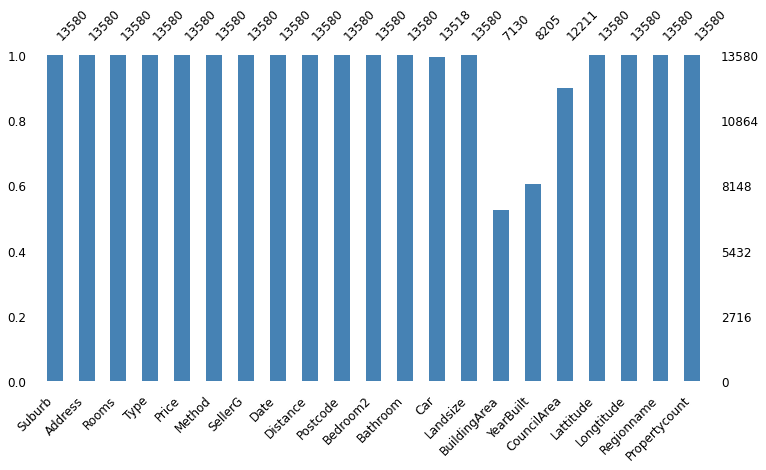

In [41]:
import missingno as msno

msno.bar(melb_data, figsize=(12, 6), fontsize=12, color='steelblue');

Podemos ver que hay solo cuatro columnas que no tienen todos sus valores, <span style="color:FireBrick">**Car**</span>, <span style="color:FireBrick">**BuildingArea**</span>, <span style="color:FireBrick">**YearBuilt**</span>, y <span style="color:FireBrick">**CouncilArea**</span>, aunque la primera tiene muy pocos datos faltantes.

También podemos visualizar las posiciones en el dataset de los datos faltantes usando `matrix()`.
El gráfico aparece en blanco siempre que falten valores.
Al ser **13580** casos, el gráfico está muy comprimido.

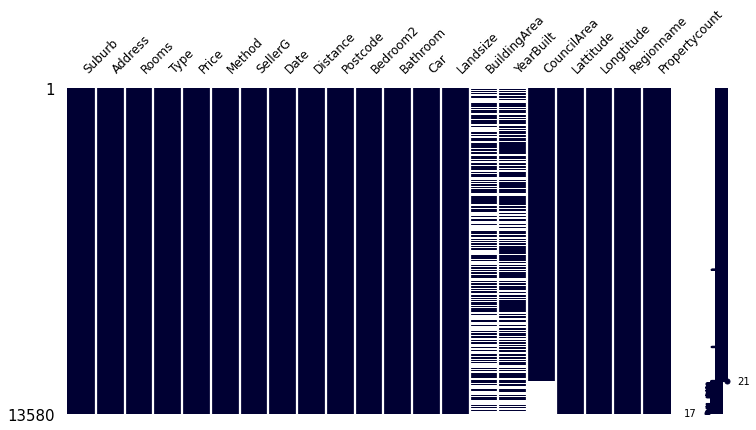

In [42]:
msno.matrix(melb_data, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]);

Si hago una muestra de **200** datos, se pueden observar las correlaciones entre los datos faltantes.
Para poder accionar sobre el dataset sin incorporar nuevos errores, es necesario corroborar que el mecanismo de pérdida sea aleatorio.

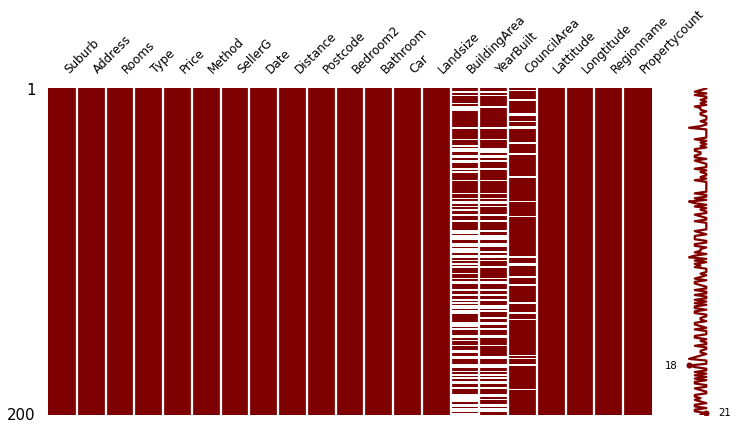

In [43]:
msno.matrix(melb_data.sample(200), figsize=(12, 6), fontsize=12, color=[0.5, 0, 0]);

Se observa una correlación entre los datos faltantes de las variables <span style="color:FireBrick">**BuildingArea**</span> y <span style="color:FireBrick">**YearBuilt**</span>.
¿Qué implica esto?

**Rta** La correlación puede implicar que el mecanismo de pérdida no sea aleatorio.

Es posible que ambos datos, al ser numéricos y exactos, no sean recordados en el momento de la toma de datos (si es que se realiza por medio de una entrevista personal).
La otra posibilidad es que los valores se pierdan en conjunto, de alguna manera que desconocemos.

### 1.8 Razones que contribuyen a tener datos faltantes

Antes de tratar los datos faltantes, es importante entender las razones de la pérdida de los datos.
En general, se modela la pérdida en tres categorias.

![Images/DatosFaltantes.png](Images/DatosFaltantes.png)

<span style="color:Red"> 1. Missing Completely at Random (MCAR)</span>

Los valores faltantes de una variable dada *Y* no estan asociados con otras variables del dataset dado, o con la misma variable *Y*.

<span style="color:Red"> 2. Missing at Random (MAR)</span>

La pérdida de los datos es aleatoria, pero puede ser explicada completamente como función de otras variables con la información completa.

<span style="color:Red"> 3. Missing Not at Random (MNAR)</span>

La pérdida depende de datos no observados, o del valor perdido.

### 1.9 Detección de correlaciones 

La existencia de correlación entre la presencia / ausencia de datos, en determinadas variables, es una muestra de la falta de aleatoriedad del mecanismo de pérdida.
Aun así puede existir una relación entre las variables, que permita imputar el dato perdido como función de los datos revelados.

### 1.9.1 Detección de correlaciones usando matrix plot

En este caso, el dataset fue recolectado para predecir el precio de las propiedades en función de sus características y su localización geográfica.
La variable <span style="color:FireBrick">**Car**</span> tiene pocos datos faltantes.
Es razonable pensar que es un error de carga, y no en la inexistencia del valor, pues cero en esta variable implica que la propiedad no tiene una cochera.

In [44]:
Car = melb_data.Car

fig = px.histogram(Car, nbins=100, marginal='violin',
                   labels={'value': 'Car', 'count': 'number of houses'},
                   title='Distribution of home with car places in Melbourne',
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(showlegend=False)
fig.show()

Es un poco raro que haya tantas casas sin cocheras, así como es raro que haya casas con diez cocheras.

In [45]:
Car = melb_data.Car
Type = melb_data.Type

pd.crosstab(Type, Car)

Car,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
Type,,,,,,,,,,,
h,846,2681,4524,702,499,63,54,7,9,1,3
t,15,492,584,19,4,0,0,0,0,0,0
u,165,2336,483,27,3,0,0,1,0,0,0


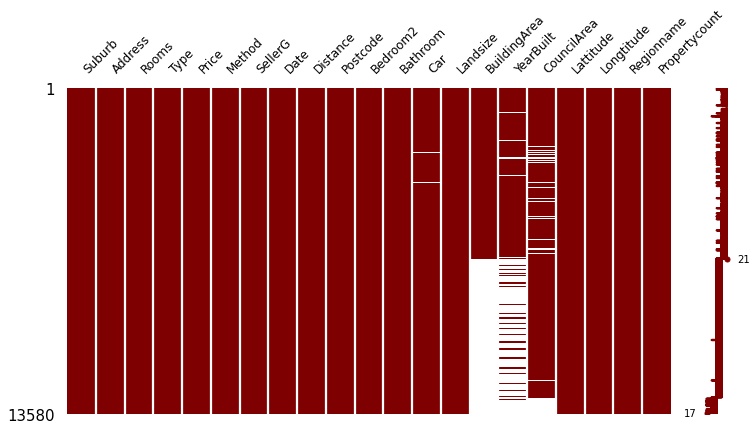

In [46]:
sorted_df = melb_data.sort_values('BuildingArea')

msno.matrix(sorted_df, figsize=(12, 6), fontsize=12, color=[0.5, 0, 0]);

### 1.9.2 Detección de correlaciones usando Heatmap

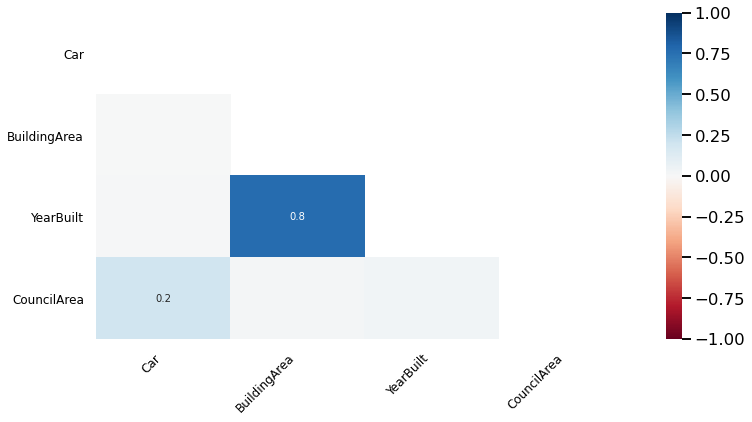

In [47]:
msno.heatmap(melb_data, figsize=(12, 6), fontsize=12);

La aleatoriedad no es completa, pues hay alta correlación entre <span style="color:FireBrick">**YearBuilt**</span> y <span style="color:FireBrick">**BuildingArea**</span>.
Aun así, es posible utilizar imputación estocástica controlando el nivel de error. 

### 2. Tratamiento del valor faltante

![Images/DiagramaFaltantes.png](Images/DiagramaFaltantes.png)

### 2.1 Eliminación de datos faltantes

Si la pérdida es completamente aleatoria, <span style="color:FireBrick">**MCAR**</span>, las operaciones simples de *Pandas* que ignoran los <span style="color:FireBrick">**NaN**</span> como el cálculo de medias y varianzas, no se ven afectadas.
Sin embargo, operaciones más complejas pueden verse afectadas y se aconseja eliminar el caso completo. 

### 2.1.1 Eliminación de **casos** completos 

Si la pérdida es completamente aleatoria, <span style="color:FireBrick">**MCAR**</span>, el porcentaje de casos con datos faltantes es pequeño.
Se elimina el caso completo. 

In [48]:
# Pandas skips the missing values, and calculates mean of the remaining values.
print(f'Media: {melb_df.Car.mean()}')
melb_df.dropna(subset=['Car'], how='any', inplace=True)
print(f'Media: {melb_df.Car.mean()}')

melb_df.Car.isnull().sum()

Media: 1.6100754549489569
Media: 1.6100754549489569


0

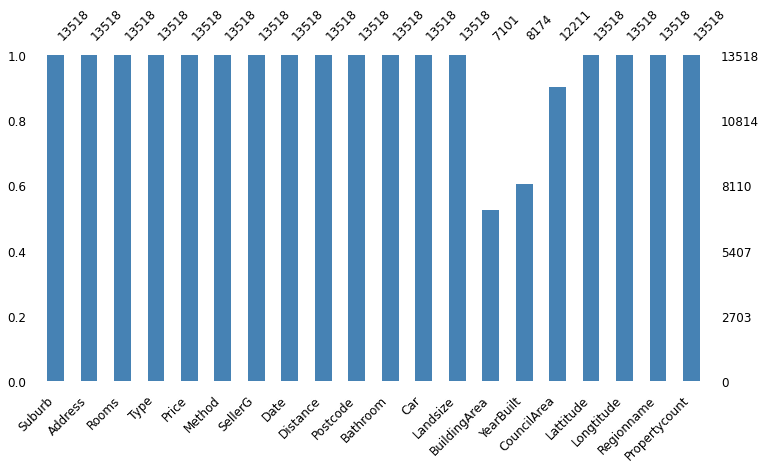

In [49]:
msno.bar(melb_df, figsize=(12, 6), fontsize=12, color='steelblue');

### 2.1.2 Eliminación de variables

Si una columna contiene muchos valores faltantes, digamos más del *80%*, y la característica no es significativa, es posible que se desee eliminar esa característica.
Sin embargo, nuevamente, no es una buena metodología para eliminar datos.

**Eliminación de todas las columnas con datos faltantes**

In [50]:
melb_data_without_missing_values = melb_data.dropna(axis=1)

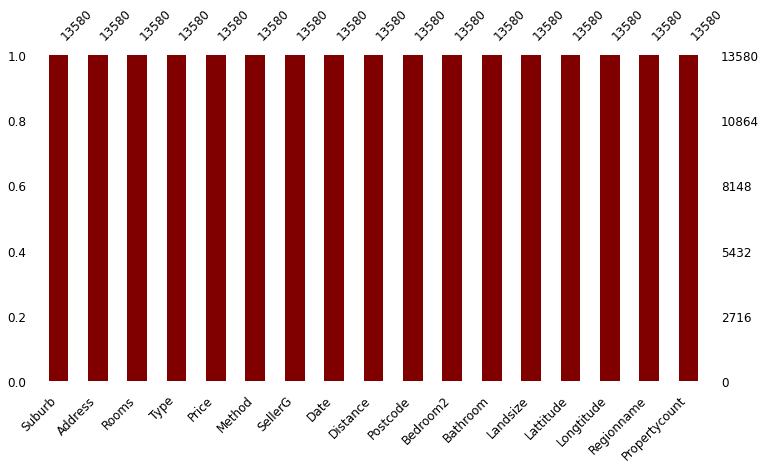

In [51]:
msno.bar(melb_data_without_missing_values, figsize=(12, 6), fontsize=12, color=[0.5, 0, 0]);

Si esas columnas tenían información útil (en los lugares que no faltaban), su modelo pierde acceso a esta información cuando se quita la columna.
Además, si a los datos de la prueba les faltan valores en lugares donde los datos de entrenamiento sí los tienen, se producirá un error.

No suele ser la mejor solución, sin embargo, puede resultar útil cuando faltan la mayoría de los valores de una columna.

**Eliminación de alguna columna muy dañada, o no tan importante**

In [52]:
melb_df = melb_df.drop('CouncilArea', axis=1)

In [53]:
geodata = melb_df[['Lattitude', 'Longtitude', 'Regionname', 'Propertycount']]

px.scatter(geodata, x='Longtitude', y='Lattitude', color='Regionname',
           hover_data=['Regionname', 'Propertycount'],
           title='Distribution of real estate by districts of Melbourne',
           color_discrete_sequence=px.colors.sequential.Oryel)

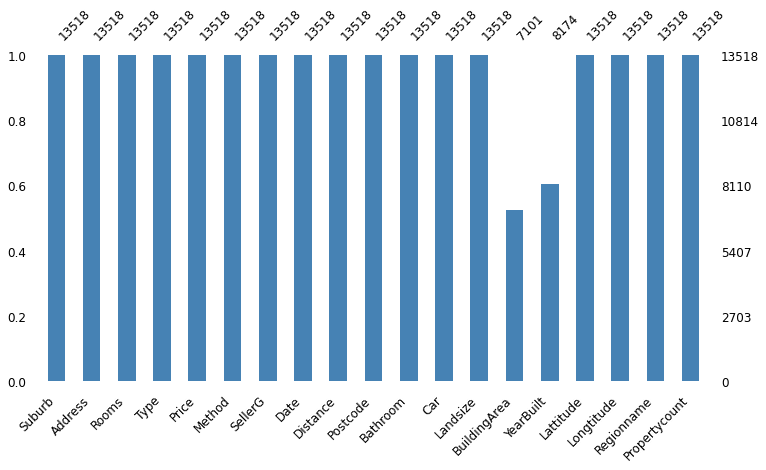

In [54]:
msno.bar(melb_df, figsize=(12, 6), fontsize=12, color='steelblue');

### 2.2 Técnicas de imputación 

**Imputar** refiere a reemplazar datos faltantes con valores sustitutos.
Hay muchas formas de imputar los valores faltantes según la naturaleza del *problema* y de los *datos*.
- Según los datos, hay técnicas para datos categóricos, datos continuos, y series de tiempo.
- Dependiendo de la naturaleza del problema, las técnicas de imputación se pueden clasificar en general como técnicas *básicas* y técnicas *avanzadas*.
    - Técnicas básicas de imputación reemplazan el dato faltante por ...
        - Un valor constante que tiene significado dentro del dominio, como **0**, distinto de todos los demás valores.
        - Un valor de otro registro seleccionado al azar.
        - Un valor medio, mediano, o de moda, para la columna.
    - Técnicas avanzadas de imputación reemplazan el dato faltante por ...
        - Un valor estimado por otro modelo predictivo.

### 2.2.1 Técnicas Básicas

- Imputar con una constante.

- Imputar usando estadísticos básicos (media, mediana, o moda, de cada columna en la cual los datos faltantes están ubicados).

Estas técnicas están incluidas en muchos paquetes de manejo de datos faltantes, y porque son operaciones básicas de filas y columnas, también pueden ser realizadas por *Pandas*.

Veamos un ejemplo del paquete **sklearn**.

In [55]:
# Imputing with a constant
from sklearn.impute import SimpleImputer

melb_data_constant = melb_df.copy()

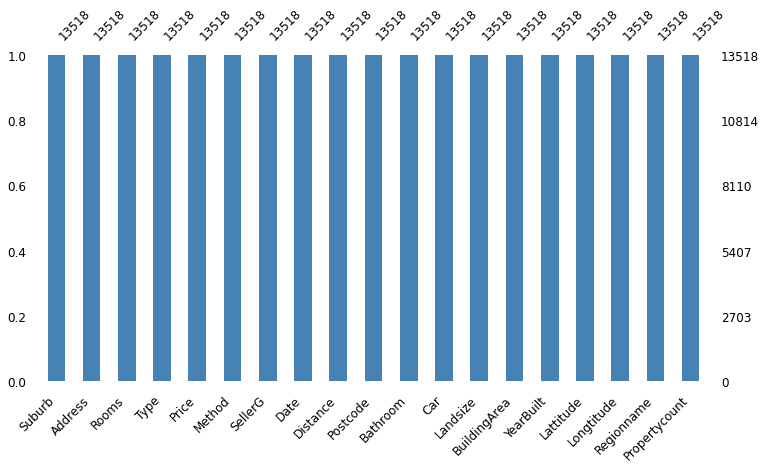

In [56]:
# Setting strategy to 'constant' and fill_value = 0
constant_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

melb_data_constant.iloc[:,:] = constant_imputer.fit_transform(melb_data_constant)

msno.bar(melb_data_constant, figsize=(12, 6), fontsize=12, color='steelblue');

In [57]:
melb_data_constant.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
3279,Heidelberg West,11 Wewak Pde,2,h,735000.00,SP,Miles,3/12/2016,9.40,3081.00,1.00,3.00,602.00,0.00,0.00,-37.75,145.05,Eastern Metropolitan,2674.00
5451,Rosanna,1 Hillside Rd,5,h,2530000.00,S,Miles,13/08/2016,11.40,3084.00,3.00,1.00,1850.00,0.00,1910.00,-37.75,145.06,Eastern Metropolitan,3540.00
10616,Carnegie,1/108 Truganini Rd,4,t,1250000.00,S,hockingstuart,8/07/2017,10.10,3163.00,3.00,2.00,326.00,223.00,2005.00,-37.89,145.05,Southern Metropolitan,7822.00
5728,Southbank,308/18 Kavanagh St,1,u,455000.00,S,Greg,11/02/2017,1.20,3006.00,1.00,0.00,760.00,70.00,2007.00,-37.82,144.97,Southern Metropolitan,8400.00
1848,Caulfield South,48A Jupiter St,4,t,1410000.00,S,Gary,19/11/2016,9.30,3162.00,2.00,3.00,342.00,0.00,2005.00,-37.90,145.02,Southern Metropolitan,5051.00
2138,Doncaster,33 Somerville St,4,h,1316000.00,S,Jellis,7/11/2016,13.90,3108.00,2.00,2.00,716.00,155.00,1965.00,-37.78,145.12,Eastern Metropolitan,9028.00
8386,St Kilda,11/52 Alma Rd,1,u,320000.00,VB,hockingstuart,8/04/2017,6.10,3182.00,1.00,1.00,1036.00,0.00,0.00,-37.86,144.99,Southern Metropolitan,13240.00
10310,Greenvale,12 Taormina St,3,h,550000.00,VB,Barry,27/05/2017,20.40,3059.00,2.00,2.00,392.00,0.00,2013.00,-37.62,144.89,Northern Metropolitan,4864.00
7395,Strathmore Heights,347 Mascoma St,4,h,800000.00,S,Considine,18/06/2016,12.50,3041.00,2.00,4.00,556.00,0.00,0.00,-37.72,144.90,Western Metropolitan,389.00
8869,Malvern East,69 Brunel St,3,h,2110000.00,S,Jellis,1/07/2017,8.40,3145.00,1.00,2.00,627.00,0.00,0.00,-37.87,145.06,Southern Metropolitan,8801.00


### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoría más.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede introducir **SESGOS** en los datos.

- Tiene sentido cuando la categoría que quiero agregar tiene sentido.

### 2.2.2 Imputar con el valor más frecuente

In [58]:
# Imputing with most_frequent
from sklearn.impute import SimpleImputer

melb_data_most_frequent = melb_df.copy()

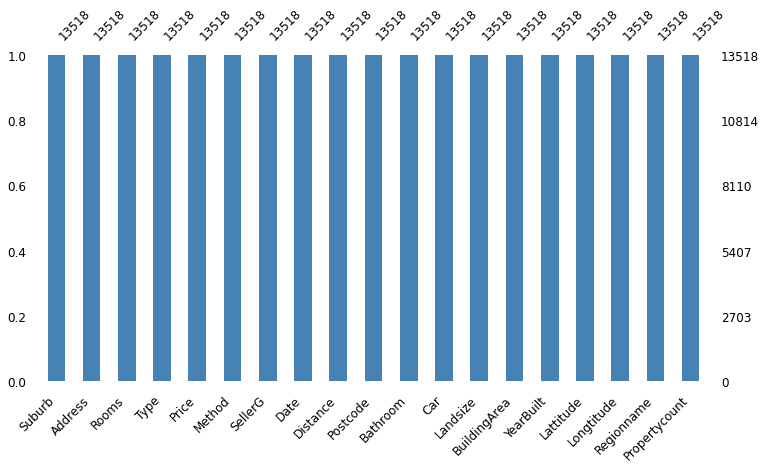

In [59]:
# Setting strategy to 'most_frequent' (can also be mean or median)
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

melb_data_most_frequent.iloc[:,:] = most_frequent_imputer.fit_transform(melb_data_most_frequent)

msno.bar(melb_data_most_frequent, figsize=(12, 6), fontsize=12, color='steelblue');

In [60]:
melb_data_most_frequent.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
303,Ascot Vale,83 Roseberry St,3,h,910000.00,S,Raine,8/10/2016,5.90,3032.00,1.00,0.00,317.00,120.00,1970.00,-37.77,144.91,Western Metropolitan,6567.00
12359,Mount Waverley,12 Beverley Gr,3,h,1800000.00,PI,McGrath,3/09/2017,14.20,3149.00,2.00,2.00,786.00,120.00,1970.00,-37.88,145.12,Eastern Metropolitan,13366.00
11588,Balwyn North,4 Carrington St,4,h,1750000.00,S,Jellis,22/07/2017,9.70,3104.00,1.00,2.00,683.00,120.00,1970.00,-37.80,145.08,Southern Metropolitan,7809.00
7135,Murrumbeena,12 Wahroongaa Rd,3,h,1420000.00,S,Woodards,13/08/2016,12.10,3163.00,1.00,1.00,700.00,120.00,1970.00,-37.89,145.07,Southern Metropolitan,4442.00
11844,Toorak,8/161 Alexandra Av,2,u,735000.00,SP,Jellis,22/07/2017,4.10,3142.00,1.00,1.00,477.31,84.00,1935.00,-37.83,145.01,Southern Metropolitan,7217.00
3369,Ivanhoe,15 Fairy St,3,h,1796000.00,S,Miles,10/09/2016,7.90,3079.00,1.00,1.00,614.00,120.00,1970.00,-37.78,145.04,Eastern Metropolitan,5549.00
12780,Mill Park,36/292 McKimmies Rd,4,t,492000.00,S,Ray,16/09/2017,17.90,3082.00,1.00,1.00,199.00,120.00,1970.00,-37.68,145.06,Northern Metropolitan,10529.00
1138,Brighton,147A Male St,2,t,1037000.00,S,Buxton,25/02/2017,11.20,3186.00,1.00,2.00,125.00,2.00,2009.00,-37.91,145.01,Southern Metropolitan,10579.00
12375,Parkdale,2 Kershaw St,4,h,1320000.00,S,Hodges,3/09/2017,21.50,3195.00,2.00,5.00,600.00,179.00,1950.00,-38.00,145.09,South-Eastern Metropolitan,5087.00
4469,Northcote,8 Reid St,2,h,1095000.00,S,Ray,22/08/2016,5.50,3070.00,1.00,2.00,306.00,86.00,1910.00,-37.76,145.00,Northern Metropolitan,11364.00


### Pros:

- Anda bien con variables categóricas **sin necesidad de usar encodings**.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede intruducir **SESGOS** en los datos.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dadas las columnas del dataset que tienen datos faltantes, imputar por la media. Decidir acciones**</span>

### Pros:

- Rápido y fácil de implementar.

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- No tiene en cuenta las correlaciones entre las variables. 

- Solo trabaja a nivel de columna.

- Da resultados pobres en categóricas codificadas.
  No debe ser usado con variables categóricas.

- No es muy preciso, y no hay cómputo para el error.

In [61]:
# Imputing with mean
from sklearn.impute import SimpleImputer

melb_data_mean = melb_df.copy()

relevant_cols = ['BuildingArea', 'YearBuilt']

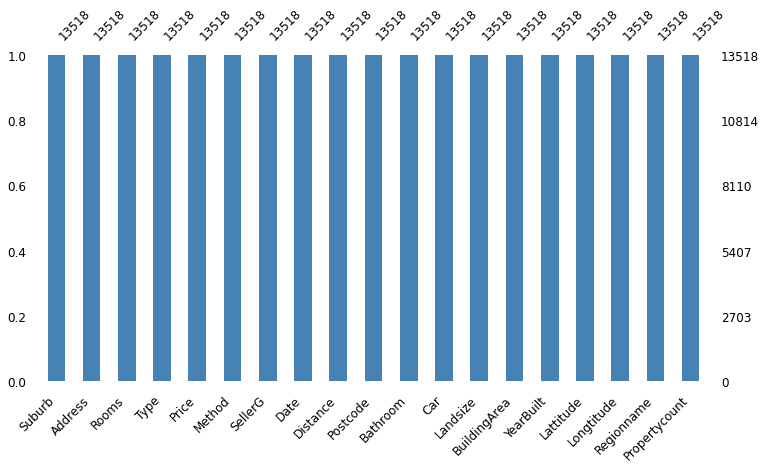

In [62]:
# Setting strategy to 'mean'
mean_imputer = SimpleImputer(strategy='mean')

melb_data_mean[relevant_cols] = mean_imputer.fit_transform(melb_data_mean[relevant_cols])

msno.bar(melb_data_mean, figsize=(12, 6), fontsize=12, color='steelblue');

In [63]:
melb_data_mean.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
13406,Croydon,19 Sevenoaks Av,5,h,905000.00,S,Barry,26/08/2017,23.00,3136.00,2.00,2.00,1005.00,185.00,1960.00,-37.78,145.27,Eastern Metropolitan,11925.00
2956,Gowanbrae,13 Seggan Cir,3,h,500000.00,S,Nelson,4/03/2017,13.60,3043.00,2.00,1.00,140.00,152.47,1964.90,-37.71,144.90,Western Metropolitan,1071.00
8696,Williamstown North,2/60 Kororoit Creek Rd,3,t,720000.00,SP,Jas,13/05/2017,8.90,3016.00,2.00,2.00,146.00,141.00,2001.00,-37.86,144.88,Western Metropolitan,802.00
2869,Glenroy,62 Farview St,3,h,500000.00,S,Nelson,3/12/2016,13.00,3046.00,1.00,1.00,336.00,152.47,1964.90,-37.71,144.94,Northern Metropolitan,8870.00
882,Bentleigh East,75 Victor Rd,3,t,825000.00,S,hockingstuart,17/09/2016,13.90,3165.00,1.00,1.00,642.00,152.47,1964.90,-37.93,145.08,Southern Metropolitan,10969.00
10735,Malvern,4/30 Finlayson St,1,u,338000.00,SP,hockingstuart,8/07/2017,5.90,3144.00,1.00,1.00,477.31,152.47,1970.00,-37.87,145.04,Southern Metropolitan,4675.00
7988,Heidelberg West,316 Liberty Pde,2,h,650000.00,S,Haughton,8/04/2017,9.40,3081.00,1.00,2.00,465.00,81.00,1960.00,-37.74,145.04,Eastern Metropolitan,2674.00
2842,Glen Iris,78 Valley Pde,4,h,2725000.00,S,Marshall,25/02/2017,9.20,3146.00,3.00,2.00,603.00,246.00,2007.00,-37.85,145.07,Southern Metropolitan,10412.00
10116,Balwyn,1/18 Weir St,2,u,602000.00,S,Noel,27/05/2017,7.90,3103.00,1.00,1.00,1129.00,72.00,1960.00,-37.82,145.08,Southern Metropolitan,5682.00
6800,Brunswick East,310/330 Lygon St,2,u,445000.00,S,Jellis,27/06/2016,4.50,3057.00,1.00,1.00,477.31,152.47,1964.90,-37.77,144.97,Northern Metropolitan,5533.00


### 2.3 Técnicas de imputación avanzadas

Técnicas de imputación avanzadas usan algoritmos de *aprendizaje automático* para imputar los valores del dataset, a diferencia de los métodos anteriores que usan otros valores de la misma columna para imputar.
Aquí vamos a ver dos métodos, y enumerar otros métodos basados en **Random Forest**:

- Nearest neighbors imputation

- Multivariate feature imputation

### 2.3.1 K-Nearest Neighbor Imputation

**K-Nearest Neighbor** es un algoritmo muy utilizado para una clasificación simple.
El algoritmo utiliza *similitud de características* para predecir los valores de cualquier nuevo punto de datos.
Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento.
Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los *k-vecinos* más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario.

Hay varias librerias que tienen este algoritmo.

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente código tiene un ejemplo del uso de la clase *KNNImputer* de *sklearn*.

In [64]:
from sklearn.impute import KNNImputer

melb_data_knn = melb_df.copy(deep=True)

relevant_cols = ['BuildingArea', 'YearBuilt']

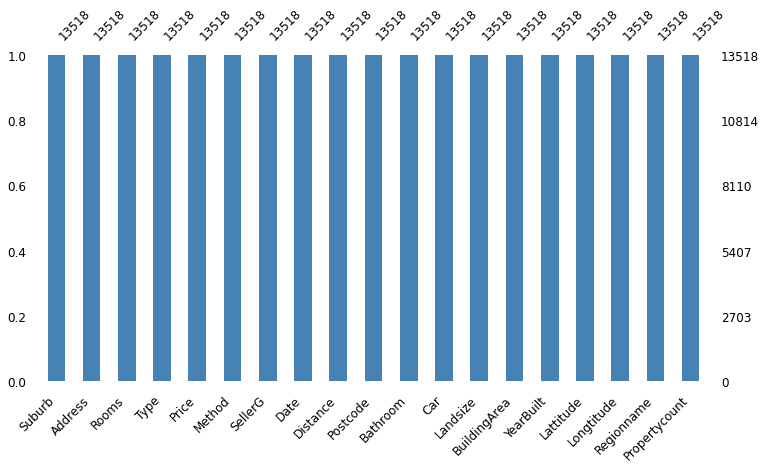

In [65]:
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')

melb_data_knn[relevant_cols] = knn_imputer.fit_transform(melb_data_knn[relevant_cols])

msno.bar(melb_data_knn, figsize=(12, 6), fontsize=12, color='steelblue');

In [66]:
melb_data_knn.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
8818,Gladstone Park,9 Dolphin Ct,3,h,625000.00,S,YPA,1/07/2017,12.90,3043.00,1.00,2.00,544.00,152.47,1964.90,-37.69,144.88,Western Metropolitan,3285.00
9333,St Kilda,1/19 Robe St,2,u,586500.00,S,Buxton,3/06/2017,5.00,3182.00,1.00,1.00,3093.00,152.47,1964.90,-37.87,144.98,Southern Metropolitan,13240.00
600,Balwyn North,6 Stuart Ct,4,h,1825000.00,S,Fletchers,4/03/2017,9.20,3104.00,2.00,3.00,736.00,225.00,1958.00,-37.79,145.10,Southern Metropolitan,7809.00
8572,Ashburton,53 Gloucester Rd,2,h,1450000.00,S,Woodards,8/04/2017,11.00,3147.00,1.00,1.00,627.00,152.47,1964.90,-37.87,145.09,Southern Metropolitan,3052.00
9659,North Melbourne,8 Baillie St,1,h,1000000.00,S,W.B.,17/06/2017,1.80,3051.00,1.00,0.00,133.00,152.47,1964.90,-37.80,144.95,Northern Metropolitan,6821.00
737,Bentleigh,38 Leckie St,3,h,1390000.00,S,Buxton,15/10/2016,13.00,3204.00,1.00,2.00,723.00,202.50,1925.00,-37.92,145.05,Southern Metropolitan,6795.00
2367,Essendon,3/25 Wright St,1,u,325000.00,S,Brad,8/10/2016,8.00,3040.00,1.00,1.00,477.31,116.50,1975.00,-37.74,144.92,Western Metropolitan,9264.00
11713,Ivanhoe,4/75 Green St,2,t,880000.00,S,Miles,22/07/2017,7.80,3079.00,1.00,2.00,229.00,113.00,2005.00,-37.77,145.03,Eastern Metropolitan,5549.00
11112,Malvern East,431 Wattletree Rd,3,h,2500000.00,PI,Jellis,12/08/2017,8.40,3145.00,3.00,3.00,1011.00,206.00,1925.00,-37.87,145.05,Southern Metropolitan,8801.00
2570,Fitzroy North,24 Apperley St,2,h,1055000.00,S,Harrington,10/12/2016,3.50,3068.00,1.00,0.00,122.00,152.47,1964.90,-37.78,144.99,Northern Metropolitan,6244.00


### Pros:

- Rápido y fácil de implementar.

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- Utiliza distancias calculadas usando los casos, aun cuando tengan **NaN's**, pero deben ser todas variables numéricas.

- Antes de imputar hay que categorizar las variables, usando *HotEncoding*, *LabelEncoding*, u *OrdinalEncoding*.

- **KNN Imputer** precisa que los datos estén estandarizados.
  Datos con diferentes escalas introducen valores de reemplazo sesgados *Scikit-Learn’s MinMaxScaler* escala las variables al [0, 1].

- No es muy preciso, y no hay cómputo para el error.

- **CouncilArea** no puede ser imputada sin realizar encoding primero.

### 2.3.2 Multivariate feature imputation 

Imputación Múltiple quiebra el problema de inferencia de los valores faltantes en tres pasos:
- Imputación
- Análisis
- Agrupación

La imputación y el análisis pueden realizarse siguiendo el análisis estándar, pero la combinación debe realizarse siguiendo la regla de *Rubin* que da la fórmula para estimar la varianza total que se compone de la varianza dentro de la imputación y la varianza entre las diferentes imputaciones.

*Imputación Múltiple por Ecuaciones Encadenadas* (**MICE**) es una estrategia para imputar valores faltantes modelando cada característica con valores perdidos como una función de otras características en forma rotatoria.
Realiza regresiones múltiples sobre una muestra aleatoria de los datos, luego toma el promedio de los valores de regresión múltiple y usa ese valor para imputar el valor faltante.

![Images/MICE.png](Images/MICE.png)

Este tipo de imputación funciona llenando los datos faltantes varias veces.
Las *imputaciones múltiples* (**IM**) son mucho mejores que una sola imputación, ya que miden la incertidumbre de los valores perdidos de una mejor manera.
El enfoque de ecuaciones encadenadas también es muy flexible, y puede manejar distintas variables de diferentes tipos de datos (es decir, continuas o binarias), así como complejidades como límites o patrones de omisión de encuestas.

La versión de *sklearn* no permite trabajar con variables de distinto tipo, hay que realizar encoding.

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

relevant_cols = ['BuildingArea', 'YearBuilt']

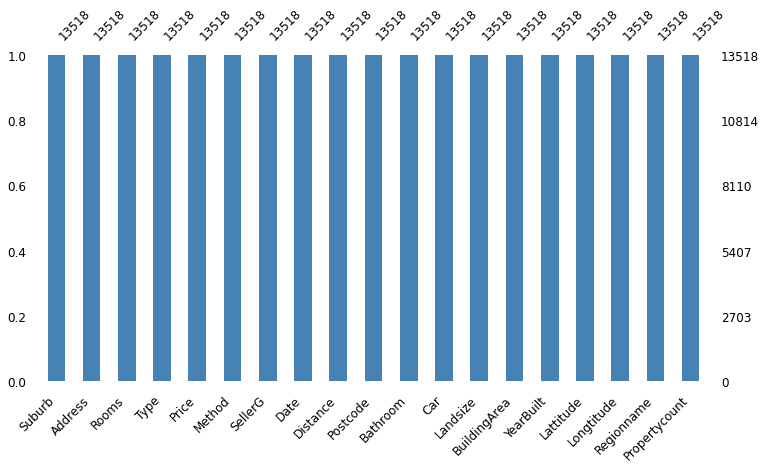

In [68]:
from sklearn.linear_model import BayesianRidge

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

melb_data_mice[relevant_cols] = mice_imputer.fit_transform(melb_data_mice[relevant_cols])

msno.bar(melb_data_mice, figsize=(12, 6), fontsize=12, color='steelblue');

In [69]:
melb_data_mice.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
10765,Mount Waverley,1 Kingswood Av,3,h,1150000.00,SP,Buxton,8/07/2017,14.20,3149.00,2.00,3.00,650.00,154.72,1965.51,-37.89,145.12,Eastern Metropolitan,13366.00
1913,Coburg,10 Shackell St,3,h,784000.00,S,Nelson,3/09/2016,7.80,3058.00,1.00,1.00,286.00,110.00,1890.00,-37.74,144.95,Northern Metropolitan,11204.00
7202,Ormond,1/25 Murray Rd,3,u,820000.00,PI,Buxton,22/05/2016,11.80,3204.00,2.00,1.00,238.00,127.00,1998.00,-37.91,145.03,Southern Metropolitan,3578.00
9114,Craigieburn,2 Benston St,4,h,725000.00,S,@Realty,3/06/2017,20.60,3064.00,2.00,3.00,854.00,44.91,1950.00,-37.60,144.94,Northern Metropolitan,15510.00
8666,South Kingsville,2/17 Greene St,2,u,321000.00,SP,Jas,13/05/2017,9.10,3015.00,1.00,1.00,477.31,186.48,1970.00,-37.83,144.87,Western Metropolitan,984.00
1665,Canterbury,1/29 Logan St,3,h,1800000.00,S,Jellis,27/11/2016,9.00,3126.00,2.00,2.00,316.00,299.73,1986.00,-37.83,145.08,Southern Metropolitan,3265.00
3163,Hawthorn,10 Oak St,4,h,3225000.00,S,Jellis,13/08/2016,4.60,3122.00,2.00,2.00,665.00,220.00,1890.00,-37.81,145.02,Southern Metropolitan,11308.00
11408,Kensington,2 Collett St,3,h,840000.00,S,Bullen,15/07/2017,3.40,3031.00,1.00,0.00,114.00,154.72,1965.51,-37.79,144.93,Northern Metropolitan,5263.00
13200,Heidelberg,6 Clyde Ct,3,h,985000.00,S,Nelson,23/09/2017,8.90,3084.00,1.00,2.00,528.00,118.00,1955.00,-37.75,145.07,Eastern Metropolitan,2890.00
148,Altona,5/35 Grieve Pde,2,u,406000.00,SP,hockingstuart,6/08/2016,13.80,3018.00,1.00,1.00,65.00,154.72,1965.51,-37.87,144.82,Western Metropolitan,5301.00


### Pros:

- Versátil, puede utilizarse con diferentes clases de clasificadores.

### Cons

- La versión de *sklearn* no admite datos mixtos, debe realizarse un encoding primero.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dadas las columnas del dataset que tienen datos faltantes,  imputar con los siguientes estimadores**</span>
- `BayesianRidge()`
- `DecisionTreeRegressor(max_features='sqrt', random_state=0)`
- `ExtraTreesRegressor(n_estimators=10, random_state=0)`
- `KNeighborsRegressor(n_neighbors=15)`

### <span style="color:FireBrick">**Decidir acciones**</span>

In [70]:
melb_data_mice = melb_df.copy(deep=True)

relevant_cols = ['BuildingArea', 'YearBuilt']

from sklearn.tree import DecisionTreeRegressor

mice_imputer = IterativeImputer(random_state=0,
                                estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0))

melb_data_mice[relevant_cols] = mice_imputer.fit_transform(melb_data_mice[relevant_cols])

melb_data_mice.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
12940,Coburg,13 Jessie St,5,h,1500000.00,VB,Nelson,19/08/2017,6.70,3058.00,3.00,4.00,900.00,180.00,1888.00,-37.75,144.96,Northern Metropolitan,11204.00
11000,Eltham,44 Silver St,3,h,925000.00,SA,Peter,12/08/2017,18.00,3095.00,1.00,2.00,1027.00,170.00,1967.28,-37.71,145.14,Eastern Metropolitan,6990.00
4773,Port Melbourne,141/95 Rouse St,2,u,1250000.00,VB,Greg,22/05/2016,3.80,3207.00,2.00,2.00,477.31,150.68,2003.00,-37.84,144.94,Southern Metropolitan,8648.00
1087,Brighton,6/4 Dudley St,2,u,1300000.00,PI,Greg,11/02/2017,11.20,3186.00,2.00,2.00,477.31,170.00,1967.28,-37.90,144.99,Southern Metropolitan,10579.00
11909,Broadmeadows,5 Evans Ct,3,h,586000.00,S,YPA,29/07/2017,14.00,3047.00,1.00,1.00,677.00,170.00,1967.28,-37.69,144.93,Northern Metropolitan,4294.00


In [71]:
melb_data_mice = melb_df.copy(deep=True)

relevant_cols = ['BuildingArea', 'YearBuilt']

from sklearn.ensemble import ExtraTreesRegressor

mice_imputer = IterativeImputer(random_state=0, max_iter=25,
                                estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))

melb_data_mice[relevant_cols] = mice_imputer.fit_transform(melb_data_mice[relevant_cols])

melb_data_mice.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
7745,Coburg,41a Rennie St,2,u,495000.00,S,Barry,6/05/2017,7.80,3058.00,1.00,0.00,388.00,69.00,1960.00,-37.75,144.97,Northern Metropolitan,11204.00
7603,Brunswick,17 Ballarat St,2,h,830000.00,VB,Nelson,13/05/2017,5.20,3056.00,1.00,1.00,153.00,232.00,1959.83,-37.77,144.96,Northern Metropolitan,11918.00
3197,Hawthorn,5 Wattle Gr,3,h,1855000.00,S,Marshall,22/08/2016,4.60,3122.00,1.00,1.00,304.00,125.00,1900.00,-37.83,145.03,Southern Metropolitan,11308.00
10428,Niddrie,1/27 Pearl St,3,t,715000.00,SP,Frank,27/05/2017,10.40,3042.00,1.00,1.00,178.00,232.00,1959.83,-37.75,144.89,Western Metropolitan,2291.00
12560,Mill Park,3 Rosehill Ct,4,h,757000.00,S,Darren,9/09/2017,17.90,3082.00,2.00,3.00,800.00,270.00,1985.00,-37.67,145.06,Northern Metropolitan,10529.00


In [72]:
melb_data_mice = melb_df.copy(deep=True)

relevant_cols = ['BuildingArea', 'YearBuilt']

from sklearn.neighbors import KNeighborsRegressor

mice_imputer = IterativeImputer(random_state=0, max_iter=2500,
                                estimator=KNeighborsRegressor(n_neighbors=15))

melb_data_mice[relevant_cols] = mice_imputer.fit_transform(melb_data_mice[relevant_cols])

melb_data_mice.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
11107,Maidstone,3/13 Winston St,3,t,710000.00,PI,Jas,12/08/2017,6.40,3012.00,2.00,2.00,186.00,134.60,2011.00,-37.79,144.86,Western Metropolitan,3873.00
648,Balwyn North,45 Woodville St,4,h,1712000.00,S,Fletchers,17/09/2016,9.20,3104.00,2.00,2.00,639.00,3772.80,1953.87,-37.79,145.09,Southern Metropolitan,7809.00
11016,Fawkner,10 Baird St,5,h,900000.00,VB,hockingstuart,12/08/2017,13.10,3060.00,3.00,4.00,663.00,3772.80,1953.87,-37.71,144.97,Northern Metropolitan,5070.00
3615,Kew,419 Barkers Rd,3,h,2770000.00,S,Marshall,13/08/2016,5.60,3101.00,3.00,4.00,1197.00,198.64,1927.00,-37.82,145.06,Southern Metropolitan,10331.00
2527,Fitzroy,291 George St,2,h,1460000.00,PI,Nelson,12/11/2016,1.60,3065.00,1.00,0.00,617.18,105.00,1890.00,-37.80,144.98,Northern Metropolitan,5825.00


### 2.3.4 Otros métodos de imputación


- **miceforest: Fast Imputation with Random Forests in Python**

Fast, memory efficient *Multiple Imputation by Chained Equations* (**MICE**) with *random forests*.
It can impute categorical and numeric data without much setup, and has an array of diagnostic plots available.

https://github.com/AnotherSamWilson/miceforest#Using-miceforest

https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

- **MissForest missingpy library**

**MissForest** imputes missing values using *Random Forests* in an iterative fashion.
By default, the imputer begins imputing missing values of the column (which is expected to be a variable) with the smallest number of missing values -- let's call this the candidate column.
The first step involves filling any missing values of the remaining, non-candidate, columns with an initial guess, which is the column mean for columns representing numerical variables and the column mode for columns representing categorical variables.

https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3


- **Datawig Imputation Using Deep Learning**

Este método funciona muy bien con características categóricas y no numéricas.
Es una biblioteca que aprende modelos de aprendizaje automático utilizando redes neuronales profundas para imputar valores faltantes en un marco de datos.
También es compatible con *CPU* y *GPU* para entrenamiento.

- **Stochastic regression imputation**

Es bastante similar a la imputación por regresión, que intenta predecir los valores perdidos haciendo una regresión de otras variables relacionadas en el mismo conjunto de datos, más algún valor residual aleatorio.

- **Extrapolation and Interpolation** 

Intenta estimar valores de otras observaciones dentro del rango de un conjunto discreto de puntos de datos conocidos.

- **Hot-Deck imputation**

Funciona eligiendo aleatoriamente el valor faltante de un conjunto de variables relacionadas y similares.

### Conclusión

No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos.
Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos.
Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.

### Desafío

In [73]:
from missingpy import MissForest

relevant_cols = ['BuildingArea', 'YearBuilt']

X = melb_df.copy(deep=True)

imputer = MissForest()

X[relevant_cols] = imputer.fit_transform(X[relevant_cols])

/home/mgobbi289/miniconda3/envs/diplodatos-aycd/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Iteration: 0
Iteration: 1
Iteration: 2


In [74]:
X.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
11256,Wonga Park,2 Rindlebrook Pl,3,h,900000.00,VB,Morrison,12/08/2017,25.20,3115.00,2.00,2.00,617.18,177.00,1972.71,-37.76,145.29,Eastern Victoria,1328.00
9203,Keilor Park,610 Fullarton Rd,3,h,670000.00,SA,Nelson,3/06/2017,10.40,3042.00,1.00,2.00,647.00,126.00,1975.00,-37.73,144.85,Western Metropolitan,1119.00
9394,Alphington,38 Grange Rd,3,h,1650000.00,VB,Nelson,17/06/2017,5.70,3078.00,1.00,2.00,827.00,97.45,1966.31,-37.78,145.03,Northern Metropolitan,2211.00
12432,Altona,7/35 Grieve Pde,2,u,458000.00,SP,hockingstuart,9/09/2017,11.00,3018.00,1.00,1.00,63.00,75.00,1975.00,-37.87,144.82,Western Metropolitan,5301.00
4167,Moorabbin,15 Genoa St,3,h,937000.00,S,Hodges,10/09/2016,14.60,3189.00,2.00,1.00,534.00,104.00,1960.00,-37.94,145.06,Southern Metropolitan,2555.00


In [75]:
import miceforest as mf

X = melb_df.copy(deep=True)

# Create kernel
kernel = mf.KernelDataSet(
    data=X[relevant_cols],
    save_all_iterations=True,
    random_state=1991
)

# Run the MICE algorithm for 3 iterations.
kernel.mice(3, verbose=True)

# Return the completed kernel data.
completed_data = kernel.complete_data()

kernel

1  | BuildingArea | YearBuilt
2  | BuildingArea | YearBuilt
3  | BuildingArea | YearBuilt


              Class: KernelDataSet
         Iterations: 3
  Imputed Variables: 2
save_all_iterations: True

In [76]:
completed_data.sample(5)

,BuildingArea,YearBuilt
2400,133.00,1915.00
11189,115.00,2012.00
7484,204.00,2011.00
2430,66.00,1970.00
13438,110.00,2010.00
